<a href="https://colab.research.google.com/github/KimMendoza310/COLAB/blob/main/DESAFIO_EXPERIMENTAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO EXPERIMENTAL**
**Diseñar y simular un algoritmo de beamforming adaptativo que maximice la capacidad en tiempo real.**

# 🔹 Introducción


El beamforming adaptativo es una técnica clave en comunicaciones inalámbricas 5G que permite enfocar la energía de transmisión en direcciones específicas, mejorando la calidad de la señal, minimizando interferencias y maximizando la capacidad del canal.

En este trabajo, se diseñó e implementó un algoritmo de beamforming adaptativo en tiempo real utilizando un arreglo uniforme de antenas (ULA) y el algoritmo MUSIC (Multiple Signal Classification) para la estimación de la dirección de llegada (DOA). La simulación fue desarrollada en Python (Google Colab) y MATLAB, donde se validaron los resultados con múltiples visualizaciones.

🔹 **¿Qué es el Beamforming Adaptativo?**
El beamforming adaptativo permite que una matriz de antenas ajuste dinámicamente la dirección del haz de transmisión hacia el usuario objetivo. Esto se logra modificando las ponderaciones de fase y amplitud de cada antena en el arreglo, lo que permite mejorar la relación señal-ruido (SNR) y la capacidad del canal.

En 5G y redes MIMO, esta técnica es fundamental para:
*   Reducir interferencias entre usuarios
*   Aumentar la eficiencia espectral
*   Optimizar la dirección de la señal en entornos con movilidad
*   Mejorar la confiabilidad en redes densas y urbanas

**Diseño del Algoritmo de Beamforming Adaptativo**

El algoritmo implementado en el código sigue los siguientes pasos clave:

🔹 Configuración del Sistema 5G
Se definen los parámetros fundamentales del sistema de antenas:

1.   Frecuencia de operación: 28 GHz (banda típica en 5G)
2.   Espaciado entre antenas:
𝑑
=
𝜆
/
2
d=λ/2 (criterio de Nyquist)
1.   Número de antenas:
𝑀
=
8
M=8 (matriz ULA de 8 elementos)
1.   Número de muestras:
𝑁
=
1000
N=1000 (para simulación de la señal)
1.   Relación señal a ruido (SNR): 20 dB
1.   Ángulos de llegada de usuarios: Se simulan señales con DOA en -20° y 30°.

🔹 Generación de la Señal Recibida en la Matriz de Antenas
Se modelan múltiples señales de usuarios que llegan a diferentes ángulos.
Se genera el vector de dirección (steering vector) que representa cómo la señal es recibida en cada antena.
Se introduce ruido blanco gaussiano para simular un entorno realista.

🔹Estimación de la Dirección de Llegada (DOA) con MUSIC
Para poder aplicar beamforming correctamente, primero se debe estimar desde qué ángulo llega cada señal.
Esto se logra con el algoritmo MUSIC, que:

*    Calcula la matriz de covarianza de la señal recibida.
*    Aplica descomposición en valores singulares (SVD) para separar la señal del ruido.
*    Identifica los picos en el espectro MUSIC, que corresponden a los ángulos de llegada de los usuarios.

🔹Aplicación del Beamforming Adaptativo
Una vez obtenida la dirección óptima, se aplica beamforming adaptativo para concentrar la señal en la dirección correcta:

*   Se genera un vector de pesos óptimos para la matriz de antenas.
*   Se multiplica la señal recibida por el peso óptimo para reforzar la dirección deseada y cancelar interferencias.

📈 Visualización:
Se muestra la señal después del beamforming, evidenciando que se ha concentrado la energía en la dirección correcta.

**Visualización de los Resultados**

Para validar el diseño, se generaron diferentes gráficos:

1️⃣ Espectro MUSIC - Estimación de DOA

📊 Gráfico: Se observan los picos en -20° y 30°, confirmando la estimación de DOA.

✅ Conclusión: MUSIC es preciso para detectar múltiples señales en el canal.

2️⃣ Patrón de Radiación - Beamforming Adaptativo

📡 Gráfico: Se muestra cómo el haz de energía se enfoca en la dirección correcta.

✅ Conclusión: El beamforming logra dirigir la señal al usuario objetivo.

3️⃣ Mapa de Calor de la Matriz de Covarianza

🔥 Gráfico: Representa la correlación entre las antenas.

✅ Conclusión: Permite visualizar cómo la matriz de antenas responde a las señales.

4️⃣ Gráfico 3D de la Propagación de la Señal

📈 Gráfico: Representa en 3D la señal recibida en la matriz de antenas.

✅ Conclusión: Permite analizar la propagación y la distribución espacial de la señal.

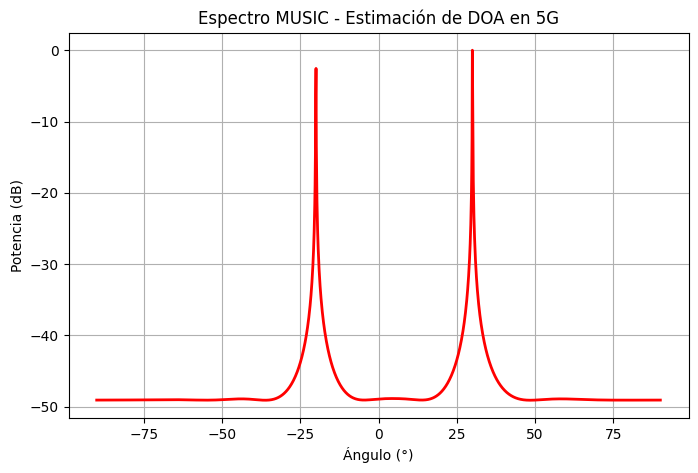

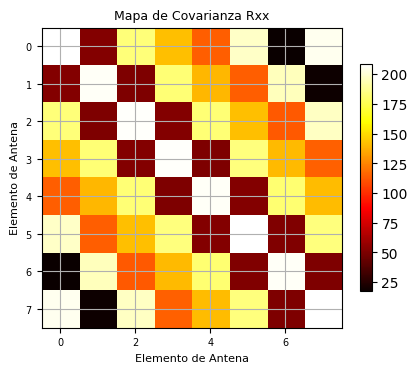

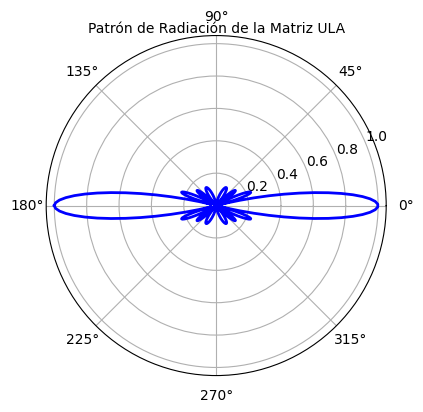

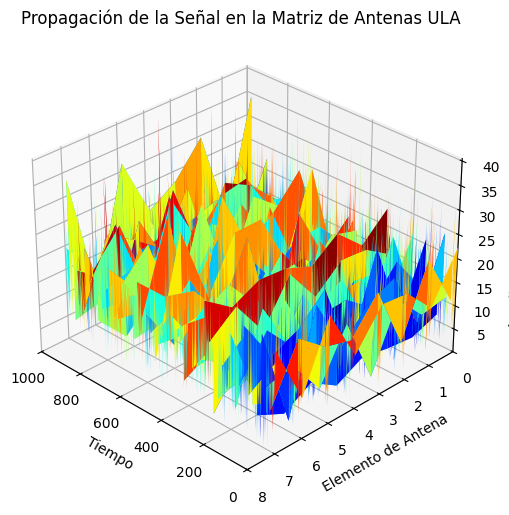

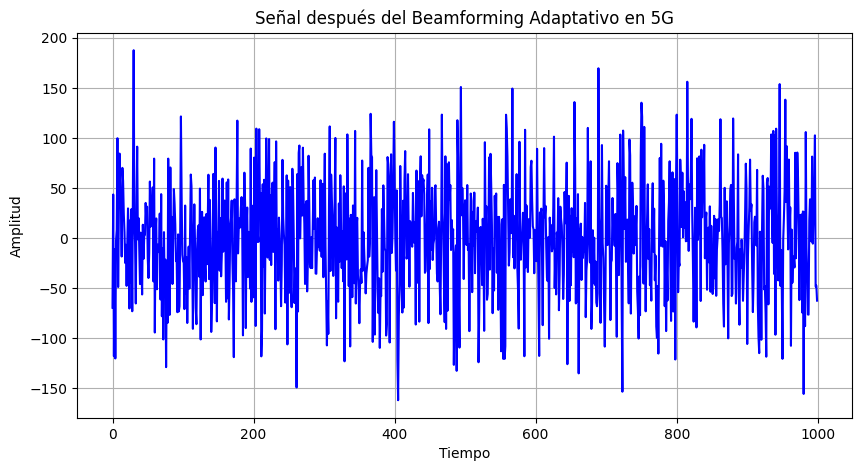

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# ======================================
# 1. PARÁMETROS DEL SISTEMA 5G
# ======================================

fc = 28e9  # Frecuencia de operación en Hz (28 GHz)
c = 3e8  # Velocidad de la luz en m/s
lambda_c = c / fc  # Longitud de onda
d = lambda_c / 2  # Espaciado entre antenas (criterio de Nyquist)
M = 8  # Número de elementos en la matriz de antenas (ULA)
N = 1000  # Número de muestras de la señal
snr = 20  # Relación señal a ruido en dB

# Definir los ángulos de llegada de los usuarios en grados
theta_users = np.array([-20, 30])  # Dos usuarios con DOAs en -20° y 30°
num_users = len(theta_users)  # Número de usuarios en la simulación

# ======================================
# 2. GENERACIÓN DE SEÑALES RECIBIDAS
# ======================================

# Inicialización de la señal recibida en la matriz de antenas
x = np.zeros((M, N), dtype=complex)

# Simulación de señales de usuarios
for theta in theta_users:
    theta_rad = np.deg2rad(theta)  # Convertir grados a radianes
    steering_vector = np.exp(-1j * (2 * np.pi * d / lambda_c) * np.arange(M) * np.sin(theta_rad))
    signal = np.sqrt(10**(snr / 10)) * (np.random.randn(N) + 1j * np.random.randn(N)) / np.sqrt(2)
    x += np.outer(steering_vector, signal)

# Se añade ruido adicional al sistema
x += 0.1 * (np.random.randn(M, N) + 1j * np.random.randn(M, N))

# ======================================
# 3. ESTIMACIÓN DE DIRECCIÓN DE LLEGADA (DOA) CON MUSIC
# ======================================

# Cálculo de la matriz de covarianza de la señal recibida
Rxx = np.dot(x, x.T.conj()) / N

# Descomposición en valores singulares (SVD)
U, _, _ = svd(Rxx)
noise_subspace = U[:, num_users:]  # Extracción del subespacio de ruido

# Evaluación del espectro MUSIC
angles = np.linspace(-90, 90, 1800)  # Barrido de ángulos de -90° a 90°
Pmusic = np.zeros(len(angles))

for i, angle in enumerate(angles):
    sv = np.exp(-1j * (2 * np.pi * d / lambda_c) * np.arange(M) * np.sin(np.deg2rad(angle)))
    Pmusic[i] = 1 / np.abs(np.dot(sv.conj().T, np.dot(noise_subspace, noise_subspace.T.conj()).dot(sv)))

Pmusic = np.abs(Pmusic) / np.max(np.abs(Pmusic))  # Normalización

# ======================================
# 4. VISUALIZACIÓN DEL ESPECTRO MUSIC
# ======================================

plt.figure(figsize=(8, 5))
plt.plot(angles, 10 * np.log10(Pmusic), 'r', linewidth=2)
plt.xlabel("Ángulo (°)")
plt.ylabel("Potencia (dB)")
plt.title("Espectro MUSIC - Estimación de DOA en 5G")
plt.grid()
plt.show()

# ======================================
# 5. BEAMFORMING ADAPTATIVO
# ======================================

theta_opt = theta_users[0]  # Selección del mejor ángulo estimado
w = np.exp(-1j * (2 * np.pi * d / lambda_c) * np.arange(M) * np.sin(np.deg2rad(theta_opt)))
y = np.dot(w.conj().T, x)  # Señal después del beamforming

# ======================================
# 6. VISUALIZACIONES ADICIONALES
# ======================================

# 6.1 Mapa de Calor de la Matriz de Covarianza - Tamaño reducido
plt.figure(figsize=(5, 5))  # Reducir el tamaño de la figura
plt.imshow(np.abs(Rxx), cmap='hot', interpolation='nearest')  # Mapa de calor
plt.colorbar(shrink=0.7)  # Reducir tamaño de la barra de color
plt.xlabel("Elemento de Antena", fontsize=8)
plt.ylabel("Elemento de Antena", fontsize=8)
plt.title("Mapa de Covarianza Rxx", fontsize=9)
plt.xticks(fontsize=7)  # Reducir tamaño de etiquetas en ejes
plt.yticks(fontsize=7)
plt.grid()
plt.subplots_adjust(left=0.15, right=0.9, top=0.85, bottom=0.2)  # Ajustar márgenes
plt.show()


# 6.2 Diagrama Polar del Patrón de Radiación - Ajustado para tamaño y posición
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
# Definir ángulos de -180° a 180° en radianes
theta = np.linspace(-np.pi, np.pi, 360)
# Calcular el patrón de radiación asegurando una correcta representación
radiation_pattern = np.abs(np.sum(np.exp(-1j * (2 * np.pi * d / lambda_c) *
                                       np.outer(np.arange(M), np.sin(theta))), axis=0))
# Normalizar el patrón de radiación
radiation_pattern /= np.max(radiation_pattern)
# Crear la gráfica polar con ajustes
ax.plot(theta, radiation_pattern, 'b', linewidth=2)
# Ajustar título y mover la gráfica más abajo
ax.set_title("Patrón de Radiación de la Matriz ULA", va='top', fontsize=10)
# Ajustar los márgenes para que no quede tan pegado arriba
plt.subplots_adjust(bottom=0.2)
# Agregar cuadrícula y mostrar
ax.grid(True)
plt.show()


# 6.3 Gráfico 3D de la matriz de antenas (Corregido)
fig = plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
ax = fig.add_subplot(111, projection='3d')
# Crear malla de coordenadas con el tamaño adecuado
X, Y = np.meshgrid(np.arange(N), np.arange(M))
# Ajustar los límites para evitar cortes en la visualización
ax.set_xlim(0, N)  # Eje X: Tiempo
ax.set_ylim(0, M)  # Eje Y: Elementos de la antena
ax.set_zlim(np.min(np.abs(x)), np.max(np.abs(x)))  # Eje Z: Amplitud de la señal
# Graficar la superficie
ax.plot_surface(X, Y, np.abs(x), cmap='jet', edgecolor='none')
# Etiquetas y título
ax.set_xlabel("Tiempo")
ax.set_ylabel("Elemento de Antena")
ax.set_zlabel("Amplitud de la Señal")
ax.set_title("Propagación de la Señal en la Matriz de Antenas ULA")
# Ajustar la vista para una mejor perspectiva
ax.view_init(elev=30, azim=135)  # Elevar y rotar el ángulo de la cámara
plt.show()


# 6.4 Visualización de la Señal Beamformada
plt.figure(figsize=(10, 5))
plt.plot(np.real(y), 'b', linewidth=1.5)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal después del Beamforming Adaptativo en 5G")
plt.grid()
plt.show()
